# Hotel Booking

Hotel booking demand datasets

https://www.kaggle.com/jessemostipak/hotel-booking-demand

https://www.sciencedirect.com/science/article/pii/S2352340918315191


## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Load Dataset

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Exploratory Data Analysis

### Check the info data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Check short statistic describe

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Check missing value

In [5]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

The **company**, **agent**, **country** and **children** features have a missing value. These missing value are replaced by its proper value respectively. 

* Company has float64 type of data, its missing value is replaced by zero
* Agent has float64 type of data, its missing value is replaced by zero
* Country has object type of data, its missing value is replaced by most country in data set
* Children has float64 type of data, its missing value is replaced by zero. This type of data is also converted to int64.

In [6]:
df['country'] = df['country'].fillna(df['country'].mode().to_string())
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)
df['children'] = df['children'].fillna(0).astype('int64')

print(df.isnull().sum())
df.info()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### Transform Features Value

Transform binary value to True and False

In [7]:
df['is_canceled'] = df['is_canceled'].apply(lambda x: True if x else False)
df['is_repeated_guest'] = df['is_repeated_guest'].apply(lambda x: True if x else False)
print('is_canceled:',df['is_canceled'].unique())
print('is_repeated_guest:',df['is_repeated_guest'].unique())

is_canceled: [False  True]
is_repeated_guest: [False  True]


### Merge Arival Time Features

In [8]:
df['Arival_Date'] = df['arrival_date_year'].astype(str) +'-'+ df['arrival_date_month'] +'-'+ df['arrival_date_day_of_month'].astype(str)
df['Arival_Date'] = pd.to_datetime(df['Arival_Date'])
df['Arival_Date'].dtypes

dtype('<M8[ns]')

### Number of previous booking cancellation and previous booking not canceled for each hotels

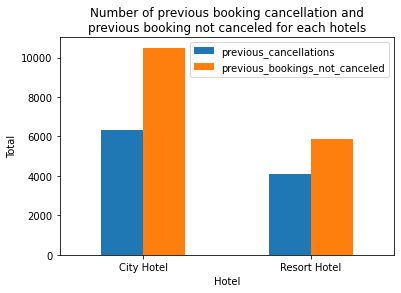

In [9]:
group_by_hotel_name = df.groupby('hotel').agg({
    'previous_cancellations':'sum',
    'previous_bookings_not_canceled':'sum'
})

group_by_hotel_name.plot(kind='bar')
plt.xlabel('Hotel')
plt.ylabel('Total')
plt.title('Number of previous booking cancellation and\nprevious booking not canceled for each hotels')
plt.xticks(rotation=0)
plt.show()

The City Hotel (orange) has a higher total number of previous cancellations than the Resort Hotel (blue). The City Hotel has also a higher total number of previous bookings that are not canceled than Resort Hotel.

### Which hotel has a higher number of customers hotel booking?

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


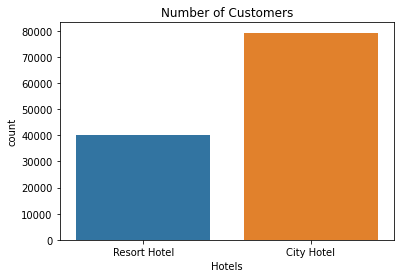

In [10]:
group_by_hotel = df['hotel'].value_counts()
print(group_by_hotel)

n_hotels = df['hotel']
sns.countplot(n_hotels)
plt.xlabel('Hotels')
plt.title('Number of Customers')
plt.show()

The City Hotel (orange) is the higher number of cutomers hotel booking about 79.330 customers than the Resort Hotel about 40.060 cutomers.

### Which hotel has a higher number of customers hotel booking cancellations?

Resort Hotel
False    28938
True     11122
Name: is_canceled, dtype: int64

City Hotel
False    46228
True     33102
Name: is_canceled, dtype: int64


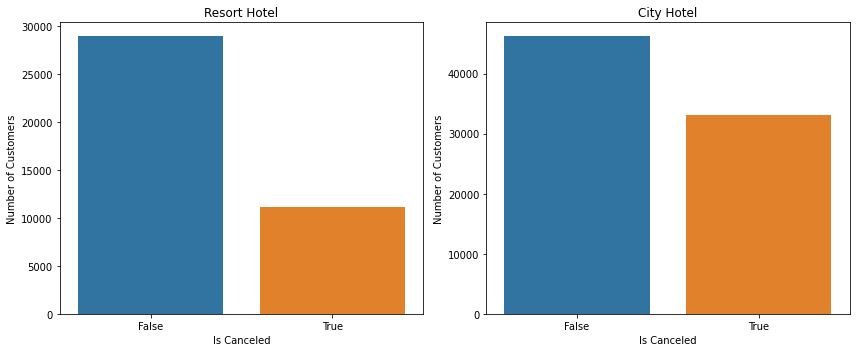

In [11]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']
print('Resort Hotel')
print(resort_hotel['is_canceled'].value_counts())
print('\nCity Hotel')
print(city_hotel['is_canceled'].value_counts())

fig1,ax1 = plt.subplots(1,2,figsize=(12,5))
sns.countplot(resort_hotel['is_canceled'],ax=ax1[0])
sns.countplot(city_hotel['is_canceled'],ax=ax1[1])
ax1[0].set_xlabel('Is Canceled')
ax1[1].set_xlabel('Is Canceled')
ax1[0].set_ylabel('Number of Customers')
ax1[1].set_ylabel('Number of Customers')
ax1[0].set_title('Resort Hotel')
ax1[1].set_title('City Hotel')
plt.tight_layout()
plt.show()

According to this data, the City Hotel (orange) has 33.102 booking cancellations. This number is higher than booking cancellations of Resort Hotel about 11.122 booking cancellations. However, the City Hotel has 46.228 hotel booking that were not canceled and the Resort Hotel has 28.938 hotel booking that were not canceled.

### Which country have higher and lower hotel booking frequency?

In [12]:
df['country'].replace('0    PRT', 'PRT', inplace=True)
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [13]:
group_by_country = df.groupby('country')['hotel'].count().reset_index().sort_values('hotel',ascending=False)
group_by_country.columns = ['Country', 'Number of Customers']
group_top_10_country = group_by_country.head(10)
group_bottom_10_country = group_by_country.tail(10)
print(group_by_country.head(10))
print()
print(group_by_country.tail(10))

    Country  Number of Customers
135     PRT                49078
59      GBR                12129
56      FRA                10415
51      ESP                 8568
43      DEU                 7287
81      ITA                 3766
76      IRL                 3375
15      BEL                 2342
25      BRA                 2224
123     NLD                 2104

    Country  Number of Customers
89      KIR                    1
143     SDN                    1
119     NAM                    1
96      LCA                    1
105     MDG                    1
109     MLI                    1
111     MMR                    1
114     MRT                    1
148     SMR                    1
137     PYF                    1


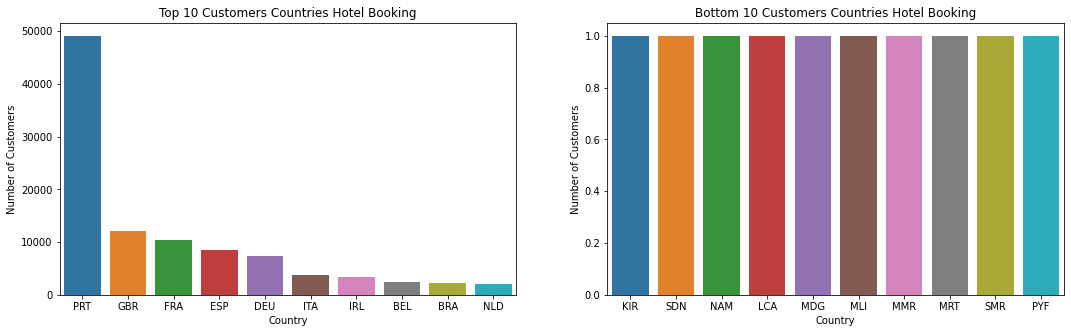

In [14]:
fig2, ax2 = plt.subplots(1,2,figsize=(18,5))
sns.barplot('Country','Number of Customers',data=group_top_10_country,ax=ax2[0])
sns.barplot('Country','Number of Customers',data=group_bottom_10_country,ax=ax2[1])
ax2[0].set_title('Top 10 Customers Countries Hotel Booking')
ax2[1].set_title('Bottom 10 Customers Countries Hotel Booking')
plt.show()

The customers from PRT is the higher number of hotel booking than other countries, where its number reach to 49.078 cutsomers.

### Which country has hgher number of booking cancellations?

In [15]:
n_cancel_country = df.groupby('country')['is_canceled'].value_counts().sort_values(ascending=False)
n_cancel_country

country  is_canceled
PRT      True           27586
         False          21492
GBR      False           9676
FRA      False           8481
ESP      False           6391
                        ...  
NCL      False              1
NIC      True               1
NPL      False              1
PLW      False              1
PYF      False              1
Name: is_canceled, Length: 292, dtype: int64

Customers from Portugal has higher hotel booking cancellations than other countries. These customers also has higher hotel check-in than other customers countries.

### How many adults, childrens and babies who were booking or were not booking at each hotels?

In [16]:
group_by_customers = df.groupby('hotel')['adults','children','babies'].sum().reset_index()
group_by_customers

,hotel,adults,children,babies
0,City Hotel,146838,7248,392
1,Resort Hotel,74798,5155,557


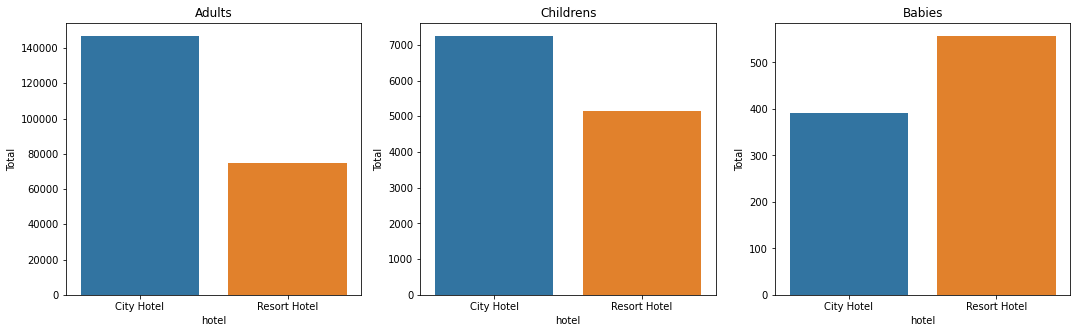

In [17]:
fig3, ax3 = plt.subplots(1,3,figsize=(18,5))
sns.barplot(x='hotel', y='adults', data = group_by_customers,ax=ax3[0])
sns.barplot(x='hotel', y='children', data = group_by_customers,ax=ax3[1])
sns.barplot(x='hotel', y='babies', data = group_by_customers,ax=ax3[2])
ax3[0].set_ylabel('Total')
ax3[1].set_ylabel('Total')
ax3[2].set_ylabel('Total')
ax3[0].set_title('Adults')
ax3[1].set_title('Childrens')
ax3[2].set_title('Babies')
plt.show()

The City Hotel has a higher number of adults and children than Resort Hotel. But, the babies number are higher at Resort Hotel than at City Hotel. It indicates, the Resort Hotel has a comfort for the customers who brings their babies.

### How many customers who realy cancel, check-in and did not show based on reservation status?

In [18]:
n_reservation_stat = df['reservation_status'].value_counts()
print('Total Reservation')
print(n_reservation_stat)

print('\nResort Hotel')
resort_res_stat = resort_hotel['reservation_status'].value_counts()
print(resort_res_stat)

print('\nCity Hotel')
city_res_stat = city_hotel['reservation_status'].value_counts()
print(city_res_stat)

Total Reservation
Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

Resort Hotel
Check-Out    28938
Canceled     10831
No-Show        291
Name: reservation_status, dtype: int64

City Hotel
Check-Out    46228
Canceled     32186
No-Show        916
Name: reservation_status, dtype: int64


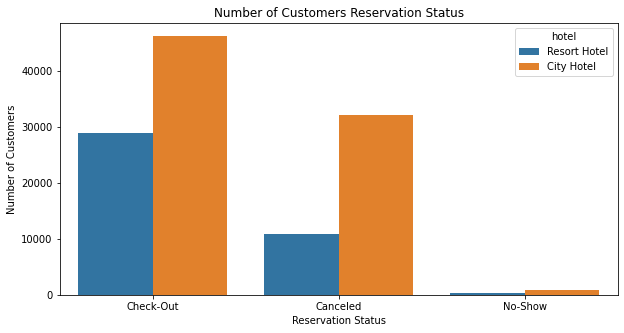

In [19]:
fig4, ax4 = plt.subplots(figsize=(10,5))
sns.countplot(x='reservation_status', hue='hotel', data=df)
ax4.set_xlabel('Reservation Status')
ax4.set_ylabel('Number of Customers')
ax4.set_title('Number of Customers Reservation Status')
plt.show()

The Check-Out status indicates the customers has checked-in but already departed. The Canceled status indicates the customers canceled the booking. The No-Show status indicates the customers did not come to check-in and they gave the reason to the hotels.

According to reservation status, the higher number of customers who realy stay at hotel is 46.228 customers which is at City Hotel and 28.938 customers who stay at Resort Hotel.

However, the number of cancellations at City Hotel also higher than the number of cancellations at Resort Hotel, where these numbers are 32.186 and 10.831 customers respectively.

Only 291 customers who did not come to Resort Hotel and 916 customers who did not come to City Hotel for any reasons.

### How many are they as repeated guest for each hotels?

Resort Hotel
False    38282
True      1778
Name: is_repeated_guest, dtype: int64

City Hotel
False    77298
True      2032
Name: is_repeated_guest, dtype: int64


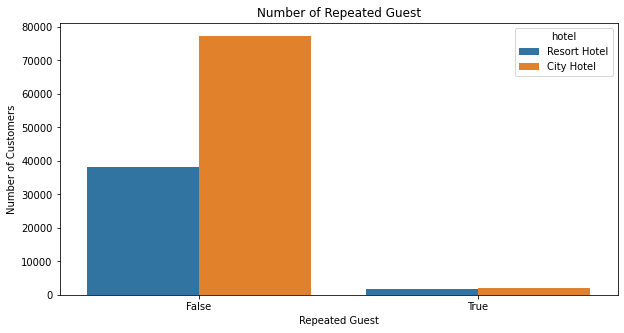

In [20]:
repeated_guest_resort = resort_hotel['is_repeated_guest'].value_counts()
repeated_guest_city = city_hotel['is_repeated_guest'].value_counts()

print('Resort Hotel')
print(repeated_guest_resort)

print('\nCity Hotel')
print(repeated_guest_city)

fig5, ax5 = plt.subplots(figsize=(10,5))
sns.countplot(x='is_repeated_guest', hue='hotel', data=df, ax=ax5)
ax5.set_xlabel('Repeated Guest')
ax5.set_ylabel('Number of Customers')
ax5.set_title('Number of Repeated Guest')
plt.show()

There are 1.778 customers as repeated guest at Resort Hotel and 2.032 customers as repeated guest at City Hotel.

### Transform Object Type to Numerical Category

Select the object type of data set

In [21]:
le = LabelEncoder()
df_obj = list(df.columns[df.dtypes == object])
df_obj

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [22]:
data = df.copy()
data[df_obj] = data[df_obj].apply(lambda x: le.fit_transform(x))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  int64         
 1   is_canceled                     119390 non-null  bool          
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  int64         
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  int64  

In [23]:
before = df[df_obj].apply(lambda x: x.unique())
after = data[df_obj].apply(lambda x: x.unique())
merged = pd.DataFrame({
    'before':before,
    'after':after
})
merged

,before,after
hotel,"[Resort Hotel, City Hotel]","[1, 0]"
arrival_date_month,"[July, August, September, October, November, D...","[5, 1, 11, 10, 9, 2, 4, 3, 7, 0, 8, 6]"
meal,"[BB, FB, HB, SC, Undefined]","[0, 1, 2, 3, 4]"
country,"[PRT, GBR, USA, ESP, IRL, FRA, ROU, NOR, OMN, ...","[135, 59, 169, 51, 76, 56, 139, 124, 127, 6, 1..."
market_segment,"[Direct, Corporate, Online TA, Offline TA/TO, ...","[3, 2, 6, 5, 1, 4, 7, 0]"
distribution_channel,"[Direct, Corporate, TA/TO, Undefined, GDS]","[1, 0, 3, 4, 2]"
reserved_room_type,"[C, A, D, E, G, F, H, L, P, B]","[2, 0, 3, 4, 6, 5, 7, 8, 9, 1]"
assigned_room_type,"[C, A, D, E, G, F, I, B, H, P, L, K]","[2, 0, 3, 4, 6, 5, 8, 1, 7, 11, 10, 9]"
deposit_type,"[No Deposit, Refundable, Non Refund]","[0, 2, 1]"
customer_type,"[Transient, Contract, Transient-Party, Group]","[2, 0, 3, 1]"


### Check Correlation For Each Pair Features

Feature of **is_canceled** is our target

In [24]:
target = 'is_canceled'
corr = data.corr()
data_corr = corr.drop(target,axis='rows').reset_index()
data_corr = data_corr.rename(columns={'index':'Features'})
data_corr[['Features',target]].sort_values(target,ascending=False)

,Features,is_canceled
21,deposit_type,0.468634
1,lead_time,0.293123
12,country,0.267502
14,distribution_channel,0.167600
16,previous_cancellations,0.110133
8,adults,0.060017
13,market_segment,0.059338
24,days_in_waiting_list,0.054186
26,adr,0.047557
7,stays_in_week_nights,0.024765


## Generate Model

**deposit_type**, **lead_time**, **country**, **total_of_special_requests**, **required_car_parking_spaces** and **hotel** are used as our model input variables because these correlation have strong tendency to the **is_canceled** feature.

There are three types of deposite, No Deposit (0), Non Refund (1), and Refundable (2). The correlation deposit type to cancellations status is 0.468634, this correlation is storng enough to positive direction. Its means, if the deposite type can de refundabled, the hotel booking cancellations status can be happend.

Lead time is the number of days since the reservation was saved in PMS to arrival date. The correlation lead time to cancellations status is 0.293123,this correlation is the second position after correlation between deposit type and cancellations status. However, it indicates, the longer time of between reservation time and arrival date, the hotel booking cancellations can be happend.

Country feature is represent as customers country. This feature has not strong correlation to cancellations status, but it can be consideration option to estimate the hotel booking cancellations status.

The feature of total of special requests has inverse correlation (negative direction) to cancellations status. The correlation value is -0.234658. It indicates, the less requests, the hotel booking cancellations can be happend.

The feature of required car parking spaces can be used to consideration option to estimate the hotel booking cancellations status, although its correlation to cancellations status is -0.195498. It indicates, the less car parking spaces, the hotel booking cancellations can be happend.

The hotel features is important option to estimate the hotel booking cancellations, although its correlation to cancellations status is not to strong. Why this feature is important? Because, we can use the option between Resort Hotel (1) or City Hotel (0) as our input model variable to estimate our goal.

#### Model input

In [25]:
varmod = ['deposit_type', 'lead_time', 'country', 'required_car_parking_spaces','total_of_special_requests','hotel']

#### Set model input and target

In [26]:
X = data[varmod]
y = data[target]

#### Split data to trainting set and testing set

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#### Logistic Regression

In [28]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)
y_predict_logreg = logreg.predict(X_test)
y_predict_logreg

array([False, False, False, ..., False, False,  True])

#### Logistic Regression Performance

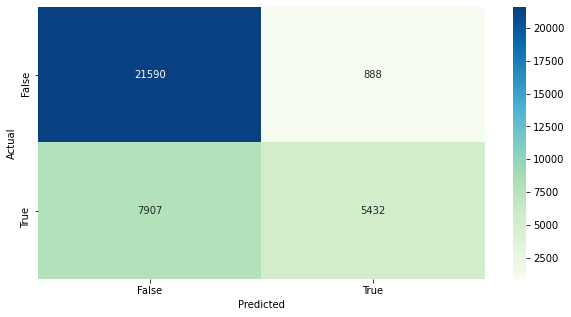

In [29]:
cm_logreg = confusion_matrix(y_test,y_predict_logreg)
fig6,ax6 = plt.subplots(figsize=(10,5))
sns.heatmap(pd.DataFrame(cm_logreg, ['False', 'True'], ['False', 'True']),cmap='GnBu',annot=True, fmt="d", ax=ax6)
ax6.set_xlabel('Predicted')
ax6.set_ylabel('Actual')
plt.show()

In [30]:
print(classification_report(y_test,y_predict_logreg))

              precision    recall  f1-score   support

       False       0.73      0.96      0.83     22478
        True       0.86      0.41      0.55     13339

    accuracy                           0.75     35817
   macro avg       0.80      0.68      0.69     35817
weighted avg       0.78      0.75      0.73     35817



#### Random Forest Classifier

In [31]:
ranfor = RandomForestClassifier()
ranfor = ranfor.fit(X_train,y_train)
y_predict_ranfor = ranfor.predict(X_test)
y_predict_ranfor

array([False, False, False, ..., False, False,  True])

#### Random Forest Performance

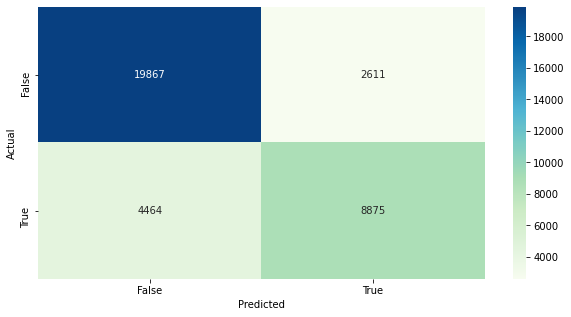

In [32]:
cm_ranfor = confusion_matrix(y_test,y_predict_ranfor)
fig7,ax7 = plt.subplots(figsize=(10,5))
sns.heatmap(pd.DataFrame(cm_ranfor, ['False', 'True'], ['False', 'True']),cmap='GnBu',annot=True, fmt="d", ax=ax7)
ax7.set_xlabel('Predicted')
ax7.set_ylabel('Actual')
plt.show()

In [33]:
print(classification_report(y_test,y_predict_ranfor))

              precision    recall  f1-score   support

       False       0.82      0.88      0.85     22478
        True       0.77      0.67      0.72     13339

    accuracy                           0.80     35817
   macro avg       0.79      0.77      0.78     35817
weighted avg       0.80      0.80      0.80     35817



#### Decision Tree Classifier

In [34]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
y_predict_dtc = dtc.predict(X_test)
y_predict_dtc

array([False, False, False, ..., False, False,  True])

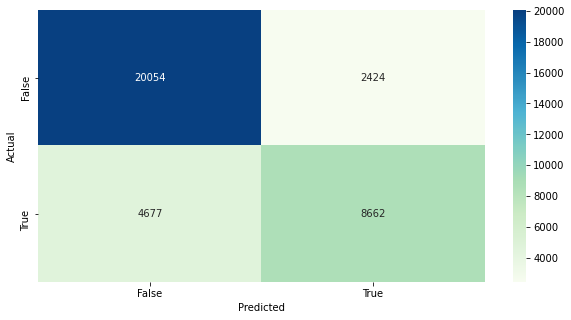

In [35]:
cm_dtc = confusion_matrix(y_test,y_predict_dtc)
fig8,ax8 = plt.subplots(figsize=(10,5))
sns.heatmap(pd.DataFrame(cm_dtc, ['False', 'True'], ['False', 'True']),cmap='GnBu',annot=True, fmt="d", ax=ax8)
ax8.set_xlabel('Predicted')
ax8.set_ylabel('Actual')
plt.show()

In [36]:
print(classification_report(y_test,y_predict_dtc))

              precision    recall  f1-score   support

       False       0.81      0.89      0.85     22478
        True       0.78      0.65      0.71     13339

    accuracy                           0.80     35817
   macro avg       0.80      0.77      0.78     35817
weighted avg       0.80      0.80      0.80     35817



### Summary

Model has been generated by using Logistic Regression, Random Forest Classifier, and Decision Tree Classifier to predict the posibility of hotel booking cancellations. The Random Forest Classifier gives the better result than other two models, where the 82% of precision of customers who did not cancel.

### Try Model

varmod = ['deposit_type', 'lead_time', 'country', 'required_car_parking_spaces','total_of_special_requests','hotel']

Assume, we want to predict whether the customer who book the hotel with input variables are:

* Deposit type is refundable (2)
* The lead time is 60 days (mean = 104 days)
* Country is PRT (135)
* Require car parking spaces is 1 (max = 8)
* Total of special requests is 4 (max = 5)
* Hotel is Resortl Hotel (1)

In [40]:
our_test = pd.DataFrame({
    'deposit_type':[2],
    'lead_time':[60],
    'country':[135],
    'required_car_parking_spaces':[1],
    'total_of_special_requests': [4],
    'hotel': [1]
})

our_predict = ranfor.predict(our_test)
our_predict

array([False])

According to our test result above, by using the input model above, the customer will be predicted not cancel its hotel booking. Let's change the our input test mode become:

* Deposit type is no refund (1)
* The lead time is 110 days (mean = 104 days)
* Country is USA (169)
* Require car parking spaces is 0 (max = 8)
* Total of special requests is 1 (max = 5)
* Hotel is City Hotel (0)

In [59]:
our_test = pd.DataFrame({
    'deposit_type':[1],
    'lead_time':[110],
    'country':[169],
    'required_car_parking_spaces':[0],
    'total_of_special_requests': [1],
    'hotel': [0]
})

our_predict = ranfor.predict(our_test)
our_predict

array([ True])

By using input model above, the customers will be predicted cancel its hotel booking.